EDA

Load CSV Files

In [2]:
import pandas as pd
origin_data = pd.read_csv('Final_data.csv')

Variable Explanation

In [3]:
#Examine the columns
origin_data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'year_population', 'have_school', 'have_public_transit'],
      dtype='object')

In [4]:
#Examine Data Type
origin_data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
year_population          int64
have_school              int64
have_public_transit      int64
dtype: object

In [5]:
# Convert 'month' to datetime
origin_data['month'] = pd.to_datetime(origin_data['month'])

In [6]:
# Check for duplicates
duplicate_count = origin_data.duplicated().sum()

# Show the updated 'month' column and the number of duplicates
year_head = origin_data['month'].head()
year_head, duplicate_count

# Remove duplicates
origin_data = origin_data.drop_duplicates()

# Verify removal by checking the new data shape
new_data_shape = origin_data.shape
new_data_shape

(824732, 13)

In [7]:
#First Few Rows
origin_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_population,have_school,have_public_transit
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,3013000,0,0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,3013000,0,0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,3013000,0,0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,3013000,0,0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,3013000,0,0


In [8]:
#Last Few Rows
origin_data.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_population,have_school,have_public_transit
826576,2020-09-01,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,5935000,1,0
826577,2020-09-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,5935000,1,0
826578,2020-09-01,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,5935000,1,1
826579,2020-09-01,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,5935000,1,1
826580,2020-09-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,555000.0,5935000,1,1


Observations Explanation

In [9]:
#Size of Dataset
origin_data.shape

(824732, 13)

In [10]:
#Summary Statistics
origin_data.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,year_population,have_school,have_public_transit
count,824732,824732.000000,824732.000000,8.247320e+05,8.247320e+05,824732.000000,824732.000000
mean,2004-09-12 12:10:52.872448128,95.584108,1987.152862,2.936435e+05,4.409296e+06,0.250262,0.100765
min,1990-01-01 00:00:00,28.000000,1966.000000,5.000000e+03,3.013000e+06,0.000000,0.000000
25%,1998-08-01 00:00:00,73.000000,1980.000000,1.810000e+05,3.731000e+06,0.000000,0.000000
50%,2003-08-01 00:00:00,93.000000,1986.000000,2.750000e+05,4.249000e+06,0.000000,0.000000
75%,2010-08-01 00:00:00,114.000000,1994.000000,3.830000e+05,5.074000e+06,1.000000,0.000000
max,2020-09-01 00:00:00,307.000000,2019.000000,1.258000e+06,5.935000e+06,1.000000,1.000000
std,NaN,26.054802,9.448334,1.487287e+05,8.193468e+05,0.433164,0.301017


In [11]:
#Missing Value
origin_data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year_population        0
have_school            0
have_public_transit    0
dtype: int64

Visualization

Import Library

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Histogram

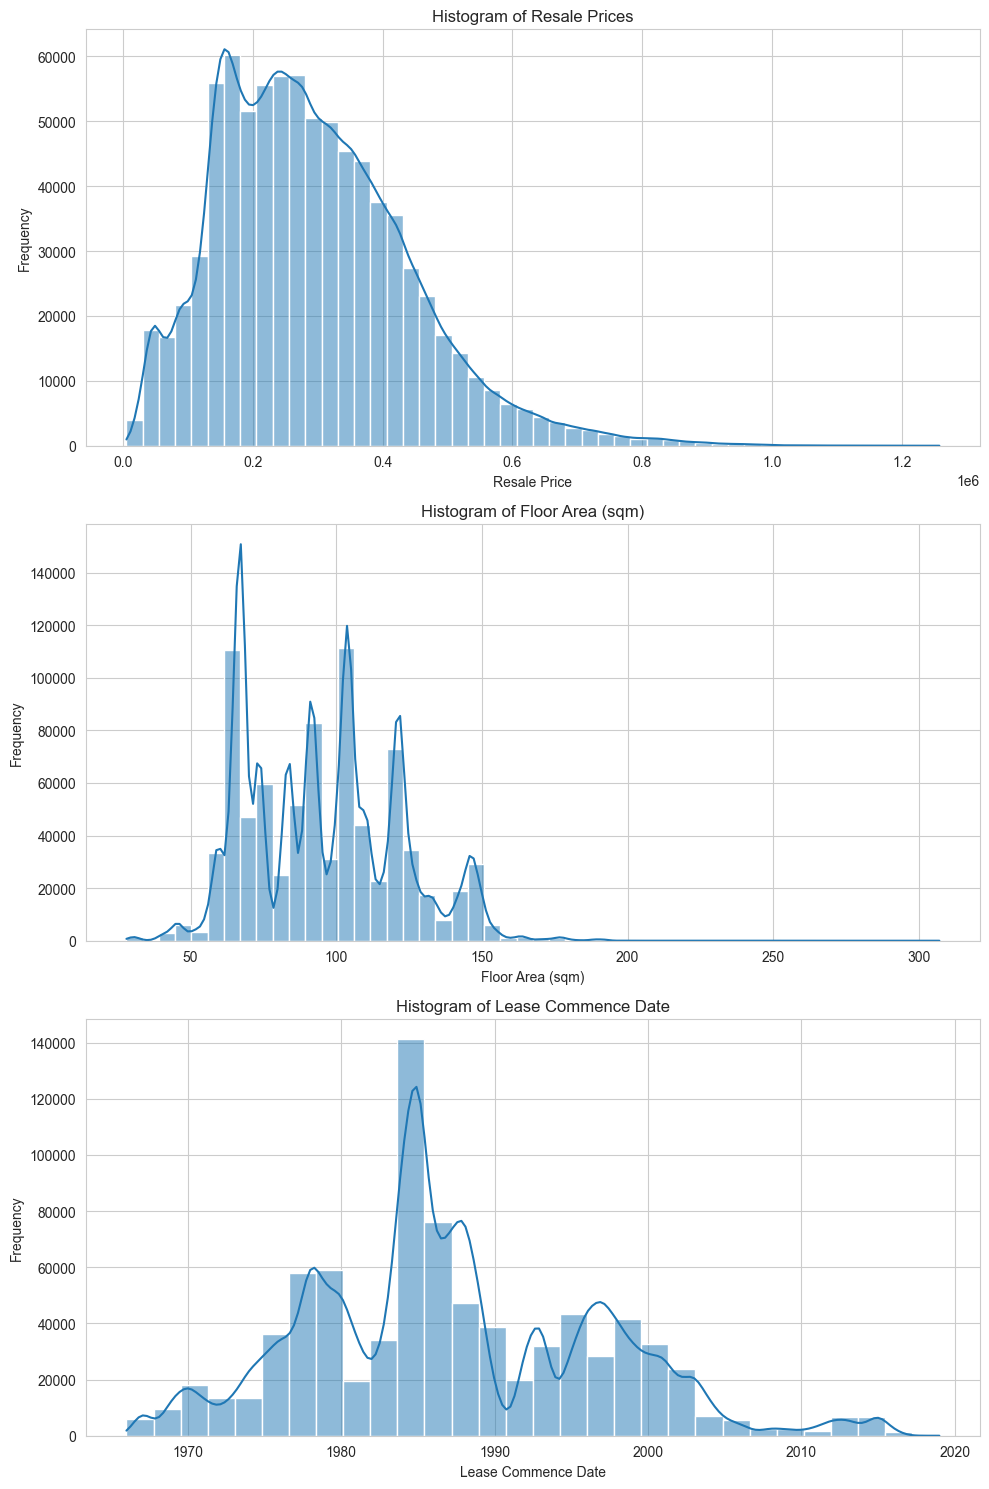

In [13]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating histograms for key variables
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Histogram for resale prices
sns.histplot(origin_data['resale_price'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Histogram of Resale Prices')
axes[0].set_xlabel('Resale Price')
axes[0].set_ylabel('Frequency')

# Histogram for floor area in square meters
sns.histplot(origin_data['floor_area_sqm'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Histogram of Floor Area (sqm)')
axes[1].set_xlabel('Floor Area (sqm)')
axes[1].set_ylabel('Frequency')

# Histogram for lease commence date
sns.histplot(origin_data['lease_commence_date'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Histogram of Lease Commence Date')
axes[2].set_xlabel('Lease Commence Date')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

BoxPlot

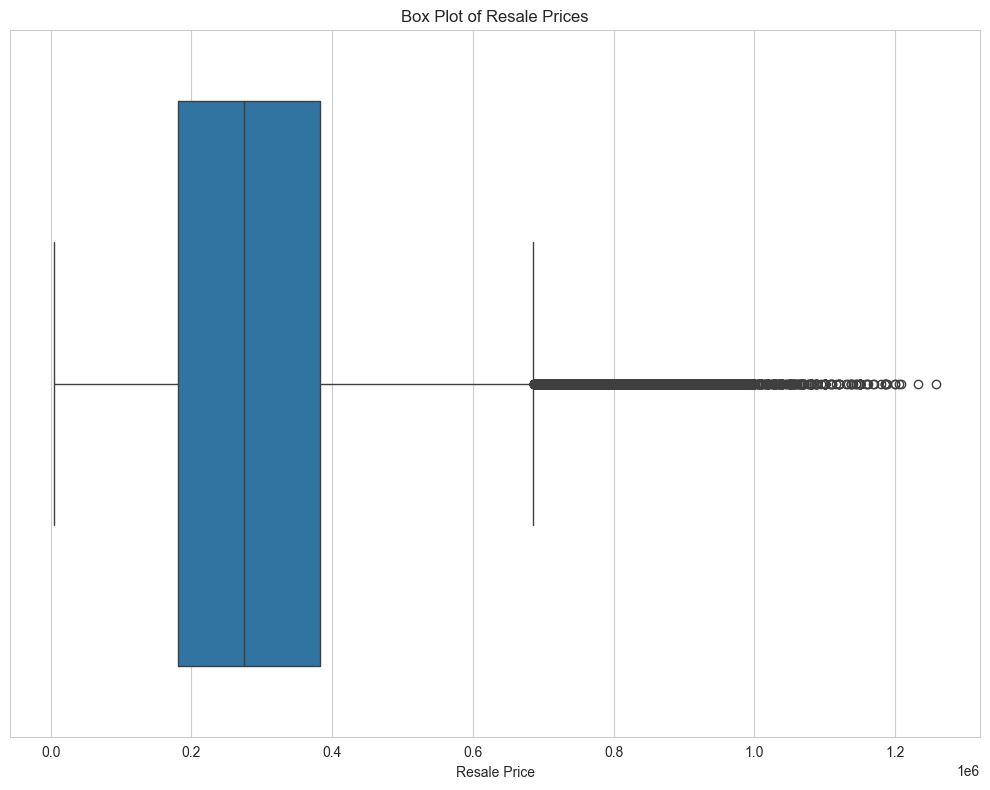

In [14]:
# Creating box plot figure
plt.figure(figsize=(10, 8))
# Box Plot for resale prices
sns.boxplot(x=origin_data['resale_price'])
plt.title('Box Plot of Resale Prices')
plt.xlabel('Resale Price')

plt.tight_layout()
plt.show()

Scatter Plots

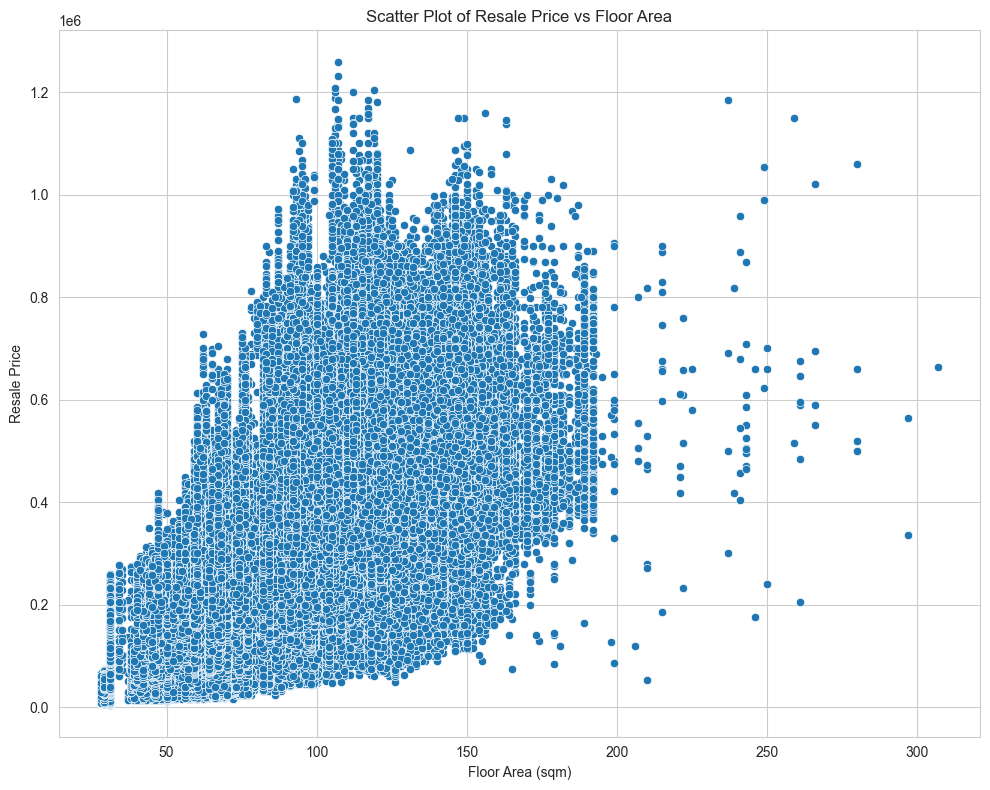

In [15]:
# Creating box plot figure
plt.figure(figsize=(10, 8))
# Scatter Plot for resale price vs floor area
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=origin_data)
plt.title('Scatter Plot of Resale Price vs Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')

plt.tight_layout()
plt.show()

Bar Charts

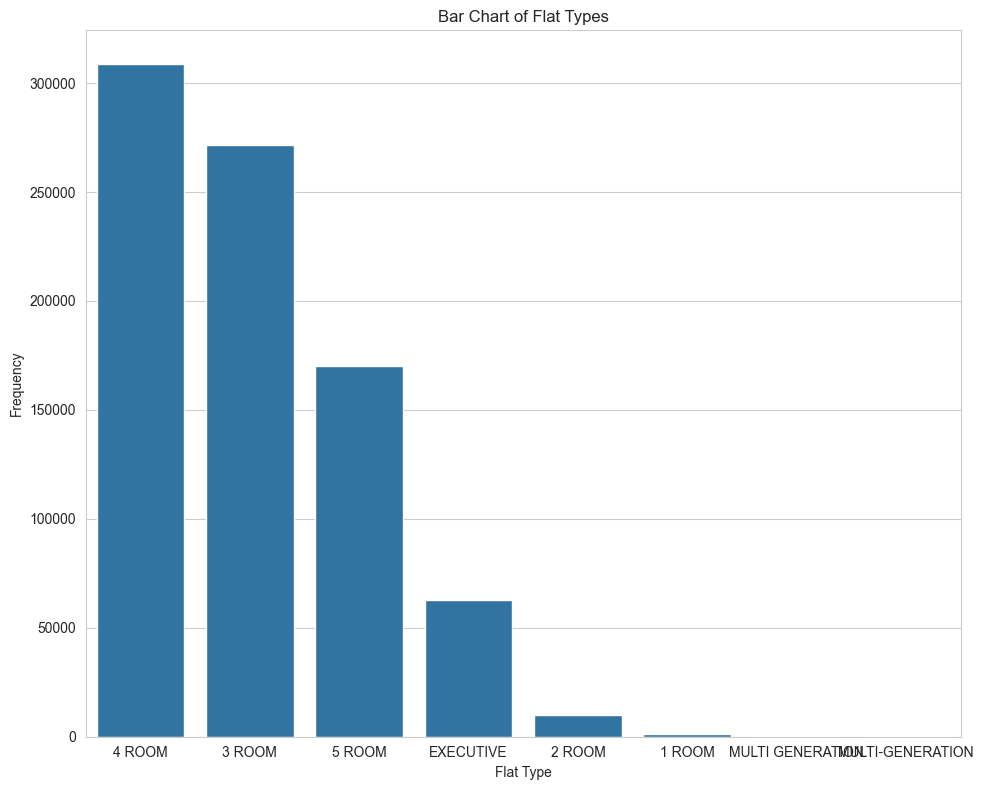

In [16]:
# Creating bar charts figure
plt.figure(figsize=(10, 8))
# Bar Chart of Flat Types
flat_type_counts = origin_data['flat_type'].value_counts()
sns.barplot(x=flat_type_counts.index, y=flat_type_counts.values)
plt.title('Bar Chart of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Time Series Plots

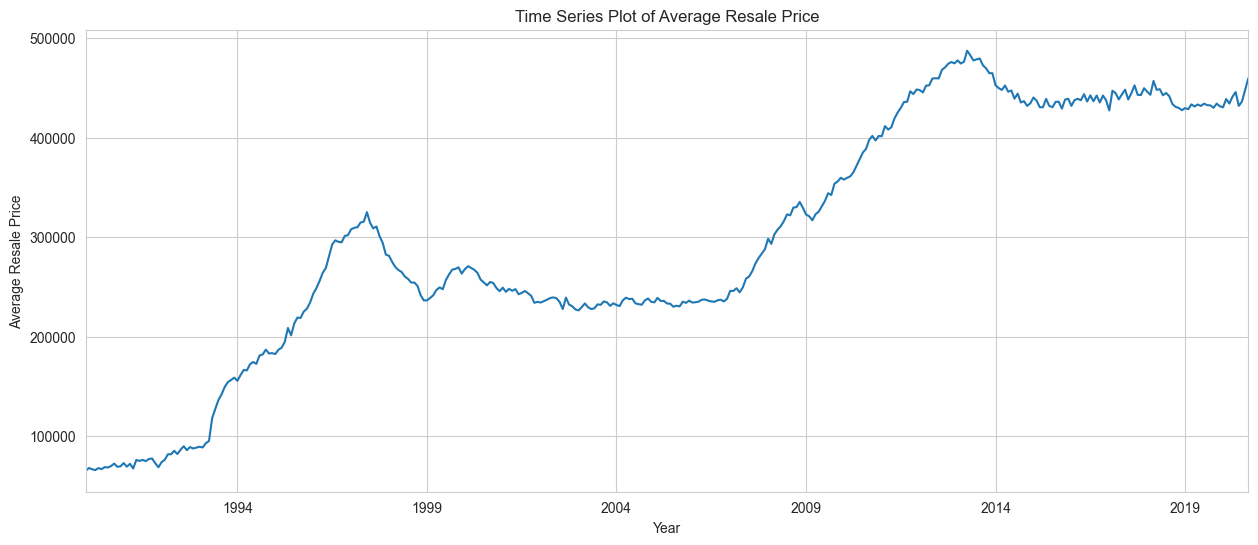

In [17]:
origin_data.set_index('month', inplace=True)

# Group by month and calculate the average resale price
monthly_avg_price = origin_data['resale_price'].resample('M').mean()

# Plotting the time series plot
plt.figure(figsize=(15, 6))
monthly_avg_price.plot()
plt.title('Time Series Plot of Average Resale Price')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()

Heat Maps

Additional Insights

In [18]:
origin_data['town'].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [19]:
origin_data['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [20]:
origin_data['block'].unique()


array(['309', '216', '211', ..., '473A', '294A', '164A'], dtype=object)

In [21]:
origin_data['street_name'].unique()


array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [22]:
origin_data['storey_range'].unique()


array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [23]:
origin_data['floor_area_sqm'].unique()


array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [24]:
origin_data['flat_model'].unique()


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft'], dtype=object)

In [25]:
origin_data['lease_commence_date'].unique()


array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [26]:
origin_data['resale_price'].unique()

array([  9000.,   6000.,   8000., ..., 822888., 671300., 459988.])

Pre-Processing

Print Boxplot again for check

In [27]:
origin_data.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_population,have_school,have_public_transit
month,,,,,,,,,,,,
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,3013000,0,0
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,3013000,0,0
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,3013000,0,0
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,3013000,0,0
1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,3013000,0,0


Data Transformation

In [28]:
origin_data.dtypes

town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
year_population          int64
have_school              int64
have_public_transit      int64
dtype: object

One-Hot Encoding

In [29]:
data_encoded = pd.get_dummies(origin_data, columns=['town'])
data_encoded = pd.get_dummies(data_encoded , columns=['block'], sparse=True)
data_encoded = pd.get_dummies(data_encoded , columns=['street_name'], sparse=True)
data_encoded = pd.get_dummies(data_encoded , columns=['flat_model'], sparse=True)
# Display the first few rows of the updated dataset
print(data_encoded.head())


           flat_type storey_range  floor_area_sqm  lease_commence_date  \
month                                                                    
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     04 TO 06            31.0                 1977   
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     07 TO 09            31.0                 1977   
1990-01-01    3 ROOM     04 TO 06            73.0                 1976   

            resale_price  year_population  have_school  have_public_transit  \
month                                                                         
1990-01-01        9000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01-01        8000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01

Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder_flat_type = LabelEncoder()
label_encoder_storey_range = LabelEncoder()

# Assigning numerical values and storing in another column
data_encoded['flat_type_encoded'] = label_encoder_flat_type.fit_transform(data_encoded['flat_type'])
data_encoded['storey_range_encoded'] = label_encoder_storey_range.fit_transform(data_encoded['storey_range'])

# Display the first few rows of the updated dataset
print(data_encoded.head())

           flat_type storey_range  floor_area_sqm  lease_commence_date  \
month                                                                    
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     04 TO 06            31.0                 1977   
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     07 TO 09            31.0                 1977   
1990-01-01    3 ROOM     04 TO 06            73.0                 1976   

            resale_price  year_population  have_school  have_public_transit  \
month                                                                         
1990-01-01        9000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01-01        8000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01

In [31]:
import pickle
    
# save the iris classification model as a pickle file
label_encoder_flat_type_file = "Label_Encoder_Flat_Type.pkl"
label_encoder_storey_range_file = "Label_Encoder_Storey_Range.pkl" 

with open(label_encoder_flat_type_file, 'wb') as file:  
    pickle.dump(label_encoder_flat_type, file)
    
with open(label_encoder_storey_range_file, 'wb') as file:  
    pickle.dump(label_encoder_storey_range, file)

Data Normalization

In [32]:
# Convert the column to numeric type
data_encoded['year_population'] = pd.to_numeric(data_encoded['year_population'])

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be normalized
numerical_columns = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'year_population']

# Create a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit and transform the data
data_encoded[numerical_columns] = minmax_scaler.fit_transform(data_encoded[numerical_columns])

# Display the first few rows to see the normalized data
print(data_encoded.head())

           flat_type storey_range  floor_area_sqm  lease_commence_date  \
month                                                                    
1990-01-01    1 ROOM     10 TO 12        0.010753             0.207547   
1990-01-01    1 ROOM     04 TO 06        0.010753             0.207547   
1990-01-01    1 ROOM     10 TO 12        0.010753             0.207547   
1990-01-01    1 ROOM     07 TO 09        0.010753             0.207547   
1990-01-01    3 ROOM     04 TO 06        0.161290             0.188679   

            resale_price  year_population  have_school  have_public_transit  \
month                                                                         
1990-01-01      0.003192              0.0            0                    0   
1990-01-01      0.000798              0.0            0                    0   
1990-01-01      0.002394              0.0            0                    0   
1990-01-01      0.000798              0.0            0                    0   
1990-01

In [34]:
import pickle

# save the iris classification model as a pickle file
scaler_pkl_file = "Scaler.pkl"  

with open(scaler_pkl_file, 'wb') as file:  
    pickle.dump(minmax_scaler, file)

Output the Dataset

In [35]:
# Write the DataFrame to a new CSV file
# data_encoded.to_csv('processed_dataset.csv', index=False)

Sem 2

In [36]:
data = data_encoded

In [37]:
# import pandas as pd
# data = pd.read_csv('processed_dataset.csv')

In [38]:
# import pandas as pd
# chunk_size = 500000  # Number of rows per chunk
# chunks = []

# for chunk in pd.read_csv('processed_dataset.csv', chunksize=chunk_size):
#    chunks.append(chunk)

# data = pd.concat(chunks)

In [39]:
# import dask.dataframe as dd

# df = dd.read_csv('processed_dataset.csv')

# mean_value = df['resale_price'].mean().compute()
# print(mean_value)

# df = df.persist()
# data = df

In [40]:
# reimport library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

ARIMA

In [41]:
# Resample the data monthly and calculate the mean resale price
monthly_data = data['resale_price'].resample('M').mean()

# Display the first few rows of the resampled data
monthly_data.head(), monthly_data.shape

(month
 1990-01-31    0.048193
 1990-02-28    0.050371
 1990-03-31    0.049389
 1990-04-30    0.048692
 1990-05-31    0.050321
 Freq: M, Name: resale_price, dtype: float64,
 (369,))

In [42]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(monthly_data)

# Creating output of test results
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                  -1.299612
p-value                          0.629350
#Lags Used                      17.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64

In [43]:
# First differencing
monthly_data_diff = monthly_data.diff().dropna()

# Perform Augmented Dickey-Fuller test again on the differenced data
adf_result_diff = adfuller(monthly_data_diff)

# Creating output of test results for differenced data
adf_output_diff = pd.Series(adf_result_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

adf_output_diff

Test Statistic                  -4.131090
p-value                          0.000860
#Lags Used                      16.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64

In [44]:
train_data = monthly_data_diff[:-12]
test_data = monthly_data_diff[-12:]

In [45]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Running auto_arima to find the best ARIMA model
auto_arima_model = auto_arima(train_data, start_p=0, start_q=0,
                              max_p=3, max_q=3, m=12,
                              start_P=0, seasonal=True,
                              d=None, D=1, trace=False,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

# Summary of the best model
print(auto_arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  356
Model:             SARIMAX(1, 0, 2)x(0, 1, 2, 12)   Log Likelihood                1419.248
Date:                            Sun, 28 Apr 2024   AIC                          -2826.496
Time:                                    22:05:46   BIC                          -2803.452
Sample:                                02-28-1990   HQIC                         -2817.318
                                     - 09-30-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8331      0.067     12.458      0.000       0.702       0.964
ma.L1         -0.9204      0.078   

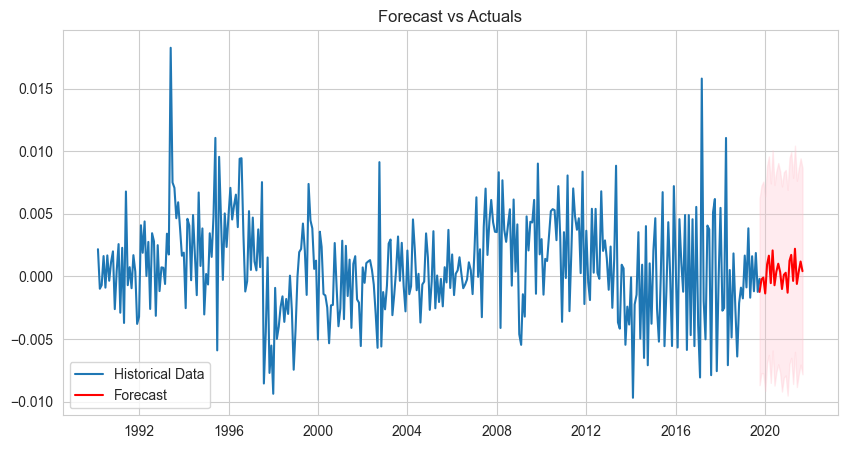

In [46]:
# Forecasting with the best model
n_periods = 24
forecast, conf_int = auto_arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the forecast alongside historical data
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data, label='Historical Data')
plt.plot(pd.date_range(train_data.index[-1], periods=n_periods, freq='M'), forecast, label='Forecast', color='red')
plt.fill_between(pd.date_range(train_data.index[-1], periods=n_periods, freq='M'), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [47]:
import numpy as np

last_known_value = monthly_data.iloc[-1]

minmax_scaler = MinMaxScaler()

minmax_scaler.fit(origin_data[['resale_price']])

# Reversing the differencing
reintegrated_forecast = np.cumsum(np.insert(forecast, 0, last_known_value))[-n_periods:]

# Reshape for scaling
reintegrated_forecast_reshaped = reintegrated_forecast.reshape(-1, 1)

# Reverse MinMax scaling
unscaled_forecast = minmax_scaler.inverse_transform(reintegrated_forecast_reshaped)

print(unscaled_forecast)

[[458176.96979211]
 [457881.01775966]
 [457771.73008574]
 [456069.36033618]
 [457284.17215993]
 [459363.32609445]
 [458693.44126141]
 [461302.06939224]
 [460421.43648808]
 [460888.94751739]
 [462165.61533285]
 [462615.12517596]
 [461360.07449081]
 [461523.94619885]
 [461896.02850689]
 [460269.53836297]
 [461836.07625517]
 [463998.95185343]
 [463552.91707715]
 [466326.36480433]
 [465578.56509974]
 [466045.9320281 ]
 [467543.77955364]
 [468072.78506632]]


In [48]:
print(last_known_value)

0.3629080527602271


In [49]:
reintegrated_conf_int_lower = np.cumsum(np.insert(conf_int[:, 0], 0, last_known_value))[-n_periods:]
reintegrated_conf_int_upper = np.cumsum(np.insert(conf_int[:, 1], 0, last_known_value))[-n_periods:]

reintegrated_conf_int_lower_reshaped = reintegrated_conf_int_lower.reshape(-1, 1)
reintegrated_conf_int_upper_reshaped = reintegrated_conf_int_upper.reshape(-1, 1)

unscaled_conf_int_lower = minmax_scaler.inverse_transform(reintegrated_conf_int_lower_reshaped)
unscaled_conf_int_upper = minmax_scaler.inverse_transform(reintegrated_conf_int_upper_reshaped)

In [50]:
monthly_data_reshape = monthly_data.values.reshape(-1, 1)
monthly_data_unscale = minmax_scaler.inverse_transform(monthly_data_reshape)
monthly_data_pd = pd.Series(monthly_data_unscale.flatten(), index=monthly_data.index)

In [51]:
import pickle

# save the iris classification model as a pickle file
arima_scaler_pkl_file = "Scaler_ARIMA.pkl"  

with open(arima_scaler_pkl_file, 'wb') as file:  
    pickle.dump(minmax_scaler, file)

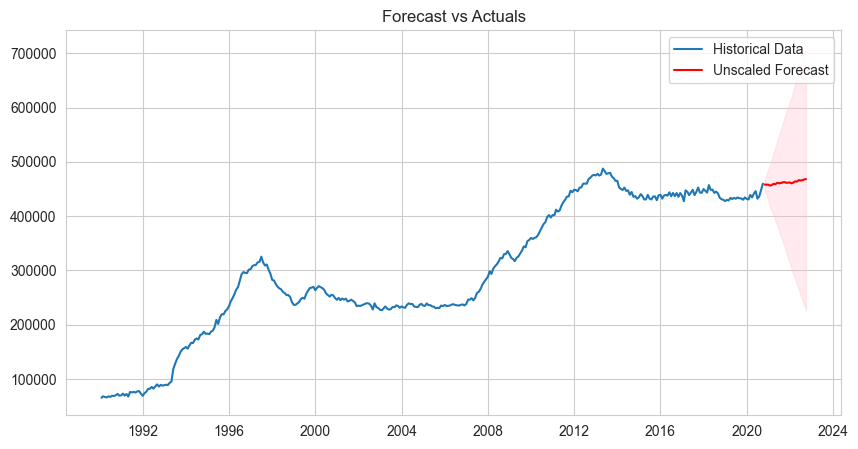

In [52]:
# Plot the forecast alongside historical data with unscaled confidence intervals
plt.figure(figsize=(10, 5))

# Ensure 'historical_data' is your unscaled and non-differenced original data series
plt.plot(monthly_data_pd.index, monthly_data_pd.values, label='Historical Data')

# Plot the unscaled forecasted data
plt.plot(pd.date_range(start=monthly_data_pd.index[-1], periods=n_periods+1, freq='M')[1:], unscaled_forecast.flatten(), label='Unscaled Forecast', color='red')

# Fill between the unscaled confidence intervals
plt.fill_between(pd.date_range(start=monthly_data_pd.index[-1], periods=n_periods+1, freq='M')[1:], unscaled_conf_int_lower.flatten(), unscaled_conf_int_upper.flatten(), color='pink', alpha=0.3)

# Include additional plot formatting as needed
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

actual = test_data
predicted = forecast[:12]

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 0.0046786384734646205
RMSE: 0.0056343953115387795


In [54]:
y_true = actual
y_pred = predicted

# Define a function to calculate MAPE, handling cases where the actual value is zero
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    mask = y_true != 0
    return (np.fabs(y_true - y_pred) / y_true)[mask].mean() * 100

# Calculate MAPE using the function
mape = mean_absolute_percentage_error(test_data, forecast[:12])

print(f'MAPE: {mape} %')

MAPE: 14.727055444633983 %


In [55]:
import numpy as np
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared_arima = r2_score(actual, predicted)
print(f'R-squared (ARIMA): {r_squared_arima}')

R-squared (ARIMA): 0.019158258013889484


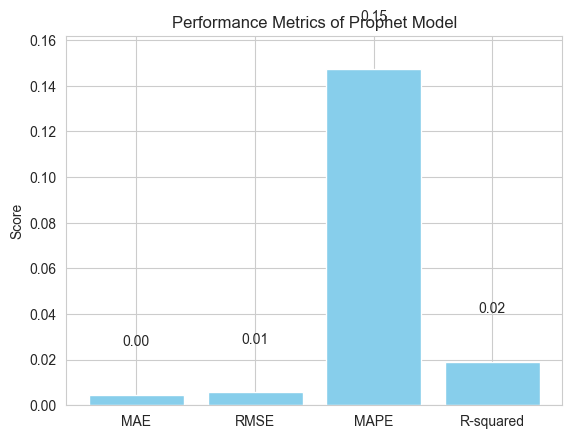

In [57]:
import matplotlib.pyplot as plt

# Assuming the metrics have been calculated as per your previous code
metrics = {
    'MAE': mae,
    'RMSE': rmse,
    'MAPE': mape/100,
    'R-squared': r_squared_arima
}

# Plotting
fig, ax = plt.subplots()
ax.bar(metrics.keys(), metrics.values(), color='skyblue')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of Prophet Model')
ax.set_ylim(0, max(metrics.values()) + (0.1 * max(metrics.values())))  # Adjust y-limit for better visual

for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [56]:
import pickle

# save the iris classification model as a pickle file
arima_model_pkl_file = "ARIMA_model.pkl"  

with open(arima_model_pkl_file, 'wb') as file:  
    pickle.dump(auto_arima_model, file)

LSTM

In [58]:
data.drop(['flat_type', 'storey_range'], axis=1, inplace=True)


In [59]:
target = data['resale_price']
data.drop(['resale_price'], axis=1, inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

def streamlined_data_generator(data, target, sequence_length, batch_size, mode='train'):
    data_len = len(data)
    train_split = int(0.8 * data_len)
    while True:
        x_batch = []
        y_batch = []
        for _ in range(batch_size):
            if mode == 'train':
                idx = np.random.randint(0, train_split - sequence_length)
            else:  # mode 'validation'
                idx = np.random.randint(train_split, data_len - sequence_length)
            x_seq = data.iloc[idx:idx + sequence_length].values  # Use DataFrame slicing
            y_seq = target.iloc[idx + sequence_length]  # Direct indexing
            x_batch.append(x_seq)
            y_batch.append(y_seq)
        yield np.array(x_batch), np.array(y_batch)

sequence_length = 2
batch_size = 32

# Define LSTM model
model = Sequential([
    LSTM(50, input_shape=(sequence_length, data.shape[1]), return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Start model training using the streamlined generator
history = model.fit(
            x=streamlined_data_generator(data, target, sequence_length, batch_size, mode='train'),
            steps_per_epoch=100,
            epochs=50,
            validation_data=streamlined_data_generator(data, target, sequence_length, batch_size, mode='validation'),
            validation_steps=30
        )


In [ ]:
from tensorflow.keras.models import load_model

model.save('LSTM_model.keras')

In [ ]:
# Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

X_test, y_test = next(streamlined_data_generator(data, target, sequence_length, batch_size=1000, mode='validation'))

# Predict using the model
predictions = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Resale Price')
plt.plot(predictions, label='Predicted Resale Price', alpha=0.7)
plt.title('LSTM Model Predictions vs. Actual')
plt.xlabel('Sample Index')
plt.ylabel('Resale Price')
plt.legend()
plt.show()

In [ ]:
dates = origin_data['month']

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(dates, y_test, label='Actual Resale Price', color='blue')
plt.plot(dates, predictions, label='Predicted Resale Price', color='orange', alpha=0.7)
plt.title('LSTM Model Time Series Predictions vs. Actual')
plt.xlabel('Date')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.legend()
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_lstm = mean_absolute_error(y_test, predictions)
rmse_lstm = np.sqrt(mean_squared_error(y_test, predictions))
mape_lstm = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r_squared_lstm = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lstm:.2f}%")
print(f"R-squared (R²): {r_squared_lstm:.2f}")

In [ ]:
lstm_model_summary = model.summary()
print(lstm_model_summary)

Prophet

22:13:41 - cmdstanpy - INFO - Chain [1] start processing
22:13:41 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), 

            ds      yhat  yhat_lower  yhat_upper
369 2020-10-31  0.340171    0.329039    0.351259
370 2020-11-30  0.339740    0.328633    0.350350
371 2020-12-31  0.338187    0.326960    0.348943
372 2021-01-31  0.335724    0.325160    0.346853
373 2021-02-28  0.337302    0.325868    0.349601
374 2021-03-31  0.337746    0.326185    0.348526
375 2021-04-30  0.337767    0.326358    0.350012
376 2021-05-31  0.339018    0.327173    0.349824
377 2021-06-30  0.337827    0.326509    0.350002
378 2021-07-31  0.337926    0.325957    0.349147
379 2021-08-31  0.338622    0.326006    0.350627
380 2021-09-30  0.339440    0.327059    0.351410


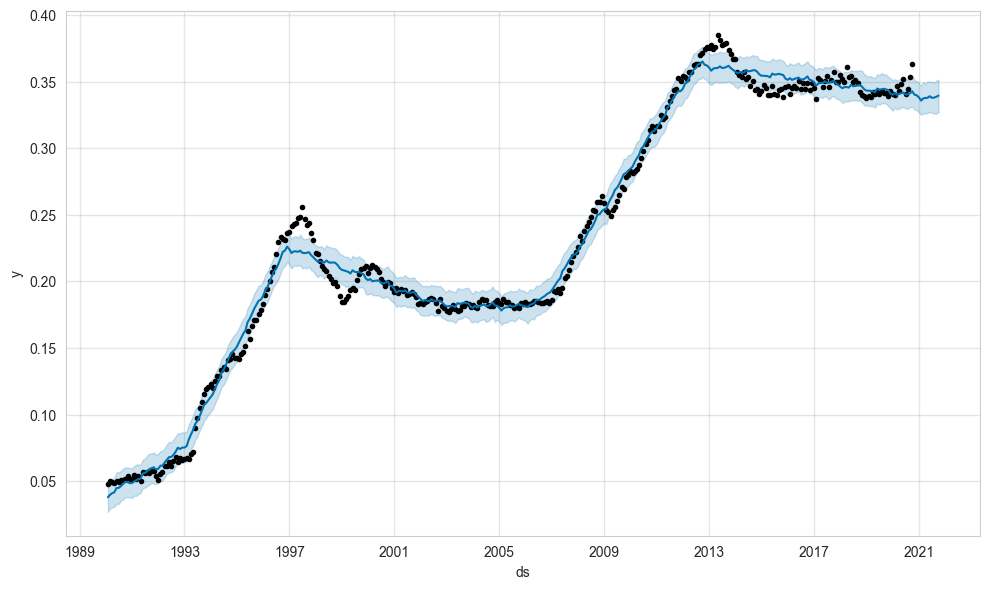

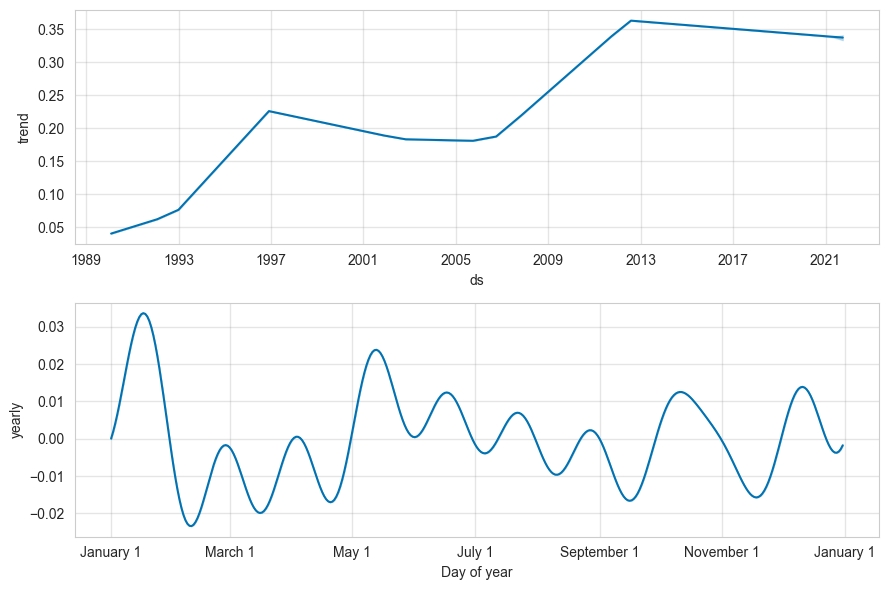

In [60]:
from prophet import Prophet
import pandas as pd

# Prepare the data
prophet_df = monthly_data.reset_index()
prophet_df.columns = ['ds', 'y']

# Initialize the Prophet model
prop_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

# Fit the model
prop_model.fit(prophet_df)

# Create future dataframe for predictions
future = prop_model.make_future_dataframe(periods=120, freq='M')

# Forecast the future
forecast = prop_model.predict(future)

# Plot the forecast
fig1 = prop_model.plot(forecast)
fig2 = prop_model.plot_components(forecast)

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

In [61]:
test_data = monthly_data

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score


# Step 1: Extract predicted values
predicted_prophet = forecast['yhat'][:-120].values 
actual_prophet = test_data.values

# Step 2: Calculate performance metrics
mae_prophet = mean_absolute_error(actual_prophet, predicted_prophet)
rmse_prophet = np.sqrt(mean_squared_error(actual_prophet, predicted_prophet))
mape_prophet = np.mean(np.abs((actual_prophet - predicted_prophet) / actual_prophet)) * 100
r_squared_prophet = r2_score(actual_prophet, predicted_prophet)

# Print the performance metrics
print(f'MAE (Prophet): {mae_prophet}')
print(f'RMSE (Prophet): {rmse_prophet}')
print(f'MAPE (Prophet): {mape_prophet} %')
print(f'R-squared (Prophet): {r_squared_prophet}')

MAE (Prophet): 0.006574486783228441
RMSE (Prophet): 0.008672966111718514
MAPE (Prophet): 3.5555620650068933 %
R-squared (Prophet): 0.9919934113140367


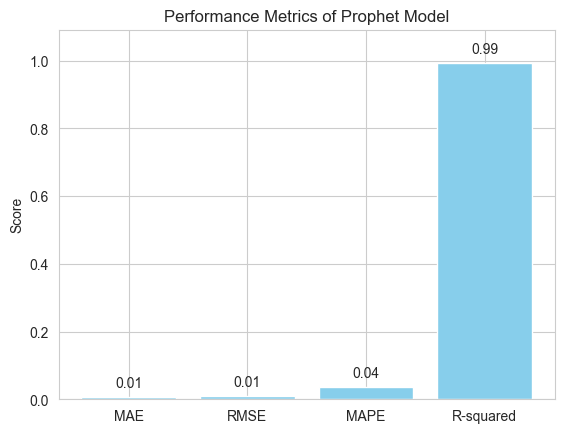

In [63]:
import matplotlib.pyplot as plt

# Assuming the metrics have been calculated as per your previous code
metrics = {
    'MAE': mae_prophet,
    'RMSE': rmse_prophet,
    'MAPE': mape_prophet/100,
    'R-squared': r_squared_prophet
}

# Plotting
fig, ax = plt.subplots()
ax.bar(metrics.keys(), metrics.values(), color='skyblue')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of Prophet Model')
ax.set_ylim(0, max(metrics.values()) + (0.1 * max(metrics.values())))  # Adjust y-limit for better visual

for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [64]:
from prophet.plot import plot_plotly, plot_components_plotly
import numpy as np

last_known_value = monthly_data.iloc[-1]

minmax_scaler = MinMaxScaler()

minmax_scaler.fit(origin_data[['resale_price']])

# To visualize the forecast components
plot_components_plotly(prop_model, forecast)

# Select the columns to unscale
scaled_columns = forecast[['yhat', 'yhat_lower', 'yhat_upper']].values  # Getting the numpy array of scaled data

# Inverse transform the scaled predictions
unscaled_predictions = minmax_scaler.inverse_transform(scaled_columns)

# Create a new DataFrame with the unscaled data, preserving the original date column
unscaled_forecast = pd.DataFrame(unscaled_predictions, columns=['yhat', 'yhat_lower', 'yhat_upper'])
unscaled_forecast['ds'] = forecast['ds']

# Print the unscaled forecast DataFrame
print(unscaled_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

            ds           yhat     yhat_lower     yhat_upper
369 2020-10-31  431234.351036  417286.316970  445127.053884
370 2020-11-30  430694.838967  416776.909170  443988.780972
371 2020-12-31  428748.893907  414681.496380  442225.303094
372 2021-01-31  425662.314626  412425.520738  439606.930934
373 2021-02-28  427639.196993  413312.442535  443049.522335
374 2021-03-31  428195.199311  413709.605320  441702.916333
375 2021-04-30  428221.799800  413926.296921  443565.476988
376 2021-05-31  429789.202847  414947.257331  443329.358630
377 2021-06-30  428297.289250  414116.374942  443552.306099
378 2021-07-31  428420.796979  413424.147697  442480.660812
379 2021-08-31  429293.251725  413485.788853  444336.209865
380 2021-09-30  430317.706940  414805.361287  445317.109767


In [ ]:
origin_data = origin_data.reset_index()

In [72]:
origin_data.set_index('month', inplace=True)

In [73]:
origin_data = origin_data['resale_price'].resample('M').mean()

In [75]:
origin_data = origin_data.reset_index()

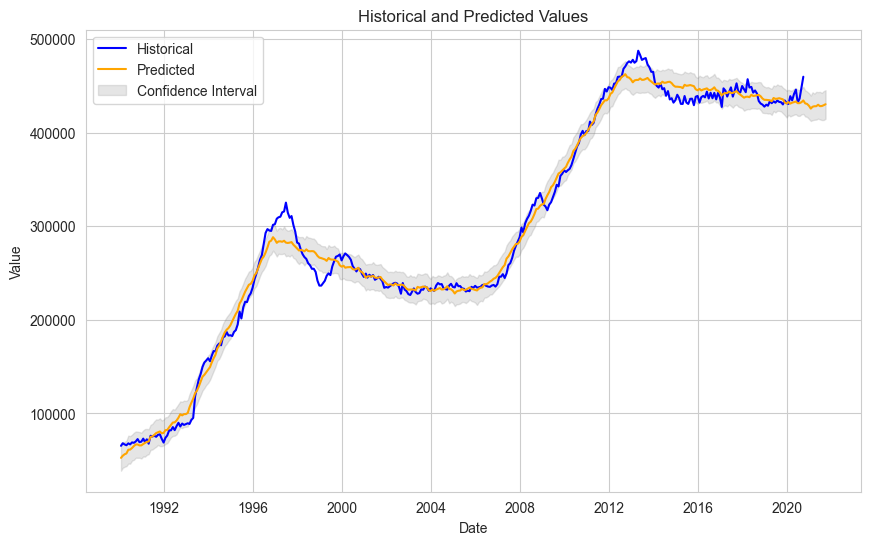

In [76]:
import matplotlib.pyplot as plt

# Assuming 'monthly_data' has columns 'ds' for date and 'y' for values
plt.figure(figsize=(10, 6))
plt.plot(origin_data['month'], origin_data['resale_price'], label='Historical', color='blue')  # Plot historical data
plt.plot(unscaled_forecast['ds'], unscaled_forecast['yhat'], label='Predicted', color='orange')  # Plot predictions
plt.fill_between(unscaled_forecast['ds'], unscaled_forecast['yhat_lower'], unscaled_forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Historical and Predicted Values')
plt.legend()
plt.show()


In [77]:
# save the iris classification model as a pickle file
prophet_model_pkl_file = "Prophet_model.pkl"  

with open(prophet_model_pkl_file, 'wb') as file:  
    pickle.dump(prop_model, file)

----------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd

# Example data
data = {
    'Metric': ['MAE', 'RMSE', 'MAPE', 'R-squared'],
    'LSTM': [mae_lstm, rmse_lstm, mape_lstm, r_squared_lstm],
    'ARIMA': [mae, rmse, mape, r_squared_arima],
    'Prophet': [mae_prophet, rmse_prophet, mape_prophet, r_squared_prophet]
}

df_metrics = pd.DataFrame(data)
df_metrics.set_index('Metric', inplace=True)
print(df_metrics)


In [ ]:
import matplotlib.pyplot as plt

# Plotting all metrics for comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Comparison of Model Performance')

metrics = ['MAE', 'RMSE', 'MAPE', 'R-squared']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    df_metrics.loc[metric].plot(kind='bar', ax=ax, color=['blue', 'green', 'red'])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xticklabels(df_metrics.columns, rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Auto-ARIMA

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima

# auto_arima_model = auto_arima(train, start_p=0, start_q=0,
#                              max_p=5, max_q=5, m=12,
#                              start_P=0, seasonal=True,
#                              d=1, D=1, trace=True,
#                              error_action='ignore',  
#                              suppress_warnings=True, 
#                              stepwise=True)

# auto_arima_model.summary()
